## Answer these questions about Classificaton
1. Why would you want to use: <br />
a. Ridge regression instead of plain linear regression (i.e., without any
regularization)?<br />it is a good way to reduce overfitting-->regularize the model.Ridge regression is preferred over plain linear regression when there is a need to address overfitting, stabilize the model in the presence of multicollinearity, improve generalization performance, and manage the bias-variance trade-off. It is a valuable tool in scenarios where the goal is to build more robust and reliable regression models.

b. Lasso instead of ridge regression?<br />An important characteristic of lasso regression is that it tends to eliminate the
weights of the least important features. Lasso regression is preferred over Ridge regression when feature selection, sparsity, model simplification, interpretability, and dimensionality reduction are important considerations. It is particularly useful in scenarios where the goal is to identify the most impactful features and build a more concise and interpretable predictive model.

c. Elastic net instead of lasso regression?It is almost always preferable to
have at least a little bit of regularization, so generally you should avoid plain
linear regression. Ridge is a good default, but if you suspect that only a few
features are useful, you should prefer lasso or elastic net because they tend to
reduce the useless features’ weights down to zero, as discussed earlier. In
general, elastic net is preferred over lasso because lasso may behave
erratically when the number of features is greater than the number of training
instances or when several features are strongly correlated.
<br />
<br />

2. Suppose you want to classify pictures as outdoor/indoor and
daytime/nighttime. Should you implement two logistic regression
classifiers or one softmax regression classifier?
 it would be more appropriate to implement one softmax regression classifier.Softmax regression is a generalization of logistic regression that can handle multiple classes. In this case, we have two sets of classes: outdoor/indoor and daytime/nighttime. Softmax regression can handle these multiple classes in a single model. Using two separate logistic regression classifiers—one for outdoor/indoor and another for daytime/nighttime—would not be ideal because it doesn't account for the potential correlations or dependencies between the classes


In [58]:
# lets import the essential packages we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Sign Language Classification

The American Sign Language MNIST Dataset we are going to use is obtained from [Kaggle](https://www.kaggle.com/datamunge/sign-language-mnist). This dataset is much like the original MNIST dataset. Each training and test case consists of a numerical label (0–25) with a one-to-one correspondence to the English alphabet (0 corresponds to A) and a grayscale 28x28 pixel image with values ranging from 0–255. However, there is no label correspondence to the letter J (9) and Z (25) due to the motion required to symbolize those letters. The number of testing and training cases in this dataset are much lower compared to the orginal MNIST dataset since there are only 27,455 training cases and 7,172 tests cases in this dataset.

<img src="images/sign_language.png" width=700 height=700 />

In this problem we are going to implement a simple multi-class classification model to classify each image to its desired label. For downloading the dataset, use this [link](https://www.kaggle.com/datamunge/sign-language-mnist).

**Note:** You may need to create a new account in Kaggle if you have not registered yet. Then put the downloaded directory in the `dataset/` folder with the name of : `sign-dataset/`

In [ ]:
import os
import string

train_dataset = pd.read_csv('/content/sign_mnist_train.csv')
test_dataset = pd.read_csv('/content/sign_mnist_test.csv')
num_rows = train_dataset.shape[0]
# To map each label number to its corresponding letter
letters = dict(enumerate(string.ascii_uppercase))

Now it is the time foe data exploration! The first few rows of the training datast are shown below:

In [59]:
train_dataset.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0
5,16,161,168,172,173,178,184,189,193,196,...,76.0,74.0,68.0,62.0,53.0,55.0,48.0,238.0,255.0,255.0
6,8,134,134,135,135,136,137,137,138,138,...,109.0,102.0,91.0,65.0,138.0,189.0,179.0,181.0,181.0,179.0
7,22,114,42,74,99,104,109,117,127,142,...,214.0,218.0,220.0,223.0,223.0,225.0,227.0,227.0,228.0,228.0
8,3,169,174,176,180,183,185,187,188,190,...,119.0,118.0,123.0,120.0,118.0,114.0,94.0,74.0,61.0,57.0
9,3,189,189,189,190,190,191,190,190,190,...,13.0,53.0,200.0,204.0,201.0,201.0,193.0,175.0,178.0,156.0


We need to separate the pixel values and the label from each other in order for us to load and access it separately. A function was constructed to split the training and testing dataset to separate the labels from the pixel values.

In [60]:
def dataframe_to_array(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1.iloc[:, 1:].to_numpy()
    targets_array = dataframe1['label'].to_numpy()
    return inputs_array, targets_array

In [ ]:
X_train, y_train = dataframe_to_array(train_dataset)
X_test, y_test = dataframe_to_array(test_dataset)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1380, 784) (1380,)
(1034, 784) (1034,)


Let’s look at the first row of the training dataset. We also need to reshape the array to (28x28) since the initial shape is just a row array.

Letter:  D


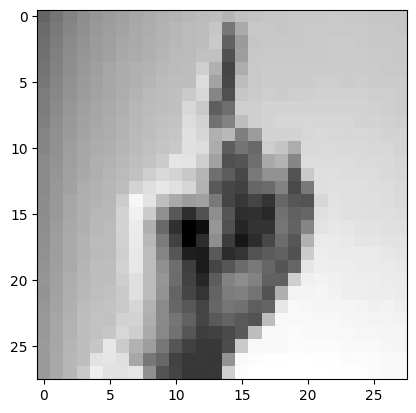

In [61]:
pic1 = np.reshape(X_train[0], (28, 28))
plt.imshow(pic1, cmap = "gray")
print("Letter: ", letters[y_train[0].item()])

As expected, the letter in the hand image is D. However, it is evident that the image is not clear due to its small resolution. This may affect the accuracy of our model and the implementation of the model in a much larger scale.

The training and testing input arrays are converted to continuous float values since it allows our model for a more precise learning as compared to discrete values. On the other hand, the training and testing labels are converted to long integers since the output of the model are indices to be used in accessing probability values.

## Q1. Implement `SimpleLogisticRegression` class. (25 points)

You are free to search on the internet about implementing a Logistic Regression model using `sklearn.linear_model.LogisticRegression`.

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Replace NaN values
imputer = SimpleImputer(strategy='mean')
# Flatten the input arrays
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Fit and transform the imputer on the training data
X_train_no_nan = imputer.fit_transform(X_train_flat)

# using the same imputer
X_test_no_nan = imputer.transform(X_test_flat)

class SimpleLogisticRegression:
    def __init__(self, learning_rate=0.001, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.model = LogisticRegression(solver='liblinear', penalty='l2', max_iter=1000)

    def fit(self, X, y):
        self.model.fit(X,y)

    def predict(self, X):
        return self.model.predict(X)

model = SimpleLogisticRegression(learning_rate=0.01, n_iterations=10000)

# Fit
model.fit(X_train_no_nan, y_train)

# Prediction
y_pred = model.predict(X_test_no_nan)

# Evaluate
accuracy = (y_pred == y_test).mean()
print("Accuracy on test data: {:.2f}%".format(accuracy * 100))


Accuracy on test data: 60.93%


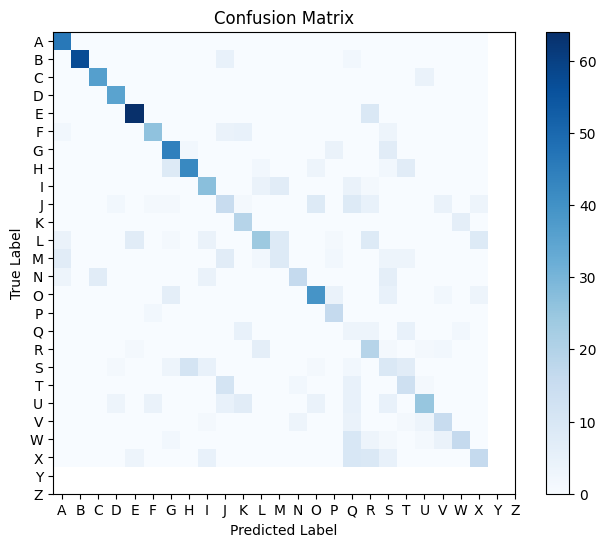

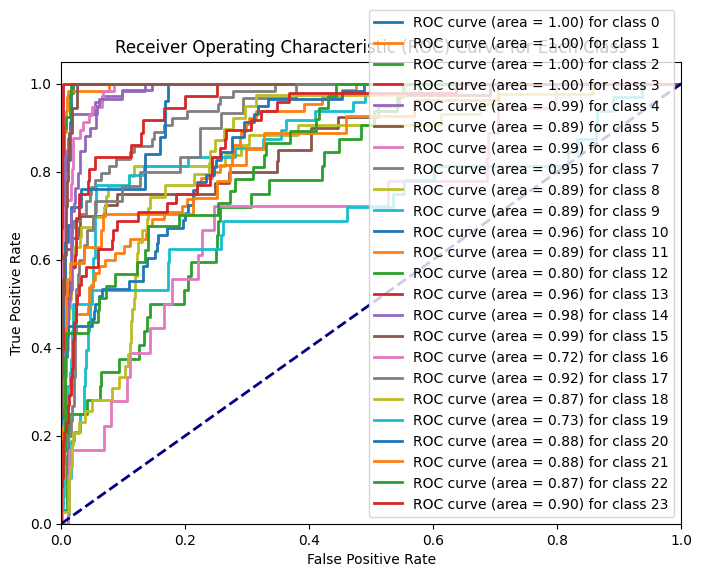

In [65]:
#plot
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Fit
model.fit(X_train_no_nan, y_train)

# Prediction
y_pred = model.predict(X_test_no_nan)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = letters.values()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score

# Fit
model.fit(X_train_no_nan, y_train)

y_prob = model.model.predict_proba(X_test_no_nan)

# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')

plt.show()

## Q2. Multi-label classification metrics. (10 points)

Search on the web and find **two** best metrics for multi-label classification. Write about how it works and why we use them. Then, implement it using `sklearn.metrics`

**ans:** hamming loss is calculated as the hamming distance between y_true and y_pred . In multi-label classification, hamming loss penalizes only the individual labels. It is suitable for multi-label classification tasks as it considers the accuracy of individual labels rather than just the overall accuracy of the model.
How it works: Hamming Loss calculates the average fraction of incorrect labels across all samples. It penalizes the model for each misclassified label, providing a more comprehensive assessment of performance in multi-label scenarios.

F1 Score is the harmonic mean of precision and recall for each label. It provides a balance between precision and recall, which is important in multi-label classification tasks. The F1 Score can be calculated using either the micro or macro averaging method.

How it works: The F1 Score balances precision  and recall to provide a single metric that captures both aspects. The micro averaging method computes the metric globally across all samples, while the macro averaging method computes the metric for each label and then takes the unweighted average.

Why we use it: The F1 Score is used because it captures the trade-off between precision and recall, offering a single metric that considers both aspects of model performance. In multi-label classification, where instances can have multiple labels, having a balanced metric like the F1 Score is valuable for evaluating the model's overall predictive capability.

In [57]:
from sklearn.metrics import hamming_loss

# Assuming
hl = hamming_loss(y_test, y_pred)
print("Hamming Loss:", hl)

from sklearn.metrics import f1_score

# Assuming
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 Score(micro):", f1)


# Assuming
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score(macro):", f1)

from sklearn.metrics import precision_score
pre = precision_score(y_test, y_pred, average='macro')
print("precision:", pre)

Hamming Loss: 0.390715667311412
F1 Score(micro): 0.6092843326885881
F1 Score(macro): 0.5823741236367486
precision: 0.599565250144262


# 3. Submission

Please read the notes here carefully:

1. The more beautiful and insightfull your plots and diagrams are, the more points you get. So please take your time and concentration to prepare a good report with nice diagrams.

2. The file you upload must be named as `[Student ID]-[Your name].zip` and it must contain **only 1 file**:

  - `Linear_and_Logistic_Regression.ipynb`
  
4. **Important Note**: The outputs of the code blocks must be remained in your notebook, otherwise, you definitly lose all the points of that